In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Credit Risk Prediction.csv')

In [3]:
df.duplicated().sum()
df.isnull().sum()

Client_ID                  0
Credit_Limit               0
Gender_Code                0
Education_Level            0
Marital_Status             0
Age_Years                  0
Repay_Sep                  0
Repay_Aug                  0
Repay_Jul                  0
Repay_Jun                  0
Repay_May                  0
Repay_Apr                  0
BillAmt_Sep                0
BillAmt_Aug                0
BillAmt_Jul                0
BillAmt_Jun                0
BillAmt_May                0
BillAmt_Apr                0
PaidAmt_Sep                0
PaidAmt_Aug                0
PaidAmt_Jul                0
PaidAmt_Jun                0
PaidAmt_May                0
PaidAmt_Apr                0
Will_Default_Next_Month    0
dtype: int64

In [4]:
#1 Male 2 Female
df['Gender_Code'].value_counts()

Gender_Code
2    18112
1    11888
Name: count, dtype: int64

In [5]:
#1 Graduate School 2 University 3 High School 4-6 Others/unknown
df['Education_Level'].value_counts()

Education_Level
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [6]:
#1 married 2 single 3 others
df['Marital_Status'].value_counts()

Marital_Status
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [7]:
df['Repay_Sep'].value_counts()

Repay_Sep
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [8]:
df['Repay_Aug'].value_counts()

Repay_Aug
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

In [9]:
df['Repay_Jul'].value_counts()

Repay_Jul
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

In [10]:
df['Repay_Jun'].value_counts()

Repay_Jun
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

In [11]:
df['Repay_May'].value_counts()

Repay_May
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64

In [12]:
df['Repay_Apr'].value_counts()

Repay_Apr
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64

In [13]:
df.drop(columns = 'Client_ID', inplace = True)

In [14]:
df.shape

(30000, 24)

In [15]:
df.columns

Index(['Credit_Limit', 'Gender_Code', 'Education_Level', 'Marital_Status',
       'Age_Years', 'Repay_Sep', 'Repay_Aug', 'Repay_Jul', 'Repay_Jun',
       'Repay_May', 'Repay_Apr', 'BillAmt_Sep', 'BillAmt_Aug', 'BillAmt_Jul',
       'BillAmt_Jun', 'BillAmt_May', 'BillAmt_Apr', 'PaidAmt_Sep',
       'PaidAmt_Aug', 'PaidAmt_Jul', 'PaidAmt_Jun', 'PaidAmt_May',
       'PaidAmt_Apr', 'Will_Default_Next_Month'],
      dtype='object')

In [16]:
cols = ['Gender_Code', 'Education_Level', 'Marital_Status',
       'Age_Years']
#These values cannot be 0. So they are null values. I'm replacing them with null first and then with most frequent value(Mode)
df[cols] = df[cols].replace(0, np.nan)
df.isnull().sum()

Credit_Limit                0
Gender_Code                 0
Education_Level            14
Marital_Status             54
Age_Years                   0
Repay_Sep                   0
Repay_Aug                   0
Repay_Jul                   0
Repay_Jun                   0
Repay_May                   0
Repay_Apr                   0
BillAmt_Sep                 0
BillAmt_Aug                 0
BillAmt_Jul                 0
BillAmt_Jun                 0
BillAmt_May                 0
BillAmt_Apr                 0
PaidAmt_Sep                 0
PaidAmt_Aug                 0
PaidAmt_Jul                 0
PaidAmt_Jun                 0
PaidAmt_May                 0
PaidAmt_Apr                 0
Will_Default_Next_Month     0
dtype: int64

In [17]:
for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

Credit_Limit               0
Gender_Code                0
Education_Level            0
Marital_Status             0
Age_Years                  0
Repay_Sep                  0
Repay_Aug                  0
Repay_Jul                  0
Repay_Jun                  0
Repay_May                  0
Repay_Apr                  0
BillAmt_Sep                0
BillAmt_Aug                0
BillAmt_Jul                0
BillAmt_Jun                0
BillAmt_May                0
BillAmt_Apr                0
PaidAmt_Sep                0
PaidAmt_Aug                0
PaidAmt_Jul                0
PaidAmt_Jun                0
PaidAmt_May                0
PaidAmt_Apr                0
Will_Default_Next_Month    0
dtype: int64

Gender_Code
2    3763
1    2873
Name: count, dtype: int64


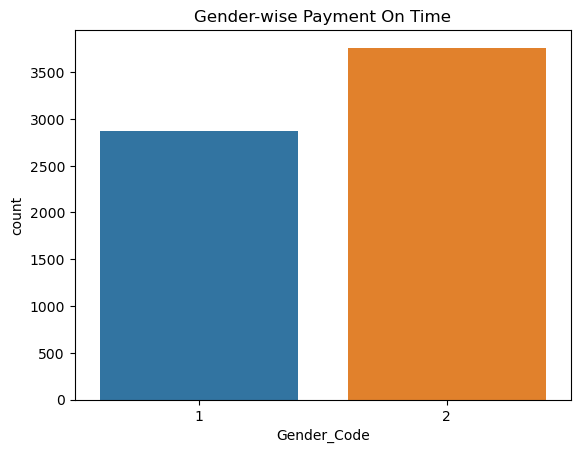

In [18]:
#Bill Amount and Paid Amount can be zero's.
#EDA part
#Female or Male who paid on time?
import matplotlib.pyplot as plt
import seaborn as sns

paid_on_time = df[df['Will_Default_Next_Month'] == 1]
gender_counts = paid_on_time['Gender_Code'].value_counts()

print(gender_counts)
sns.countplot(data=paid_on_time, x='Gender_Code')
plt.title("Gender-wise Payment On Time")
plt.show()

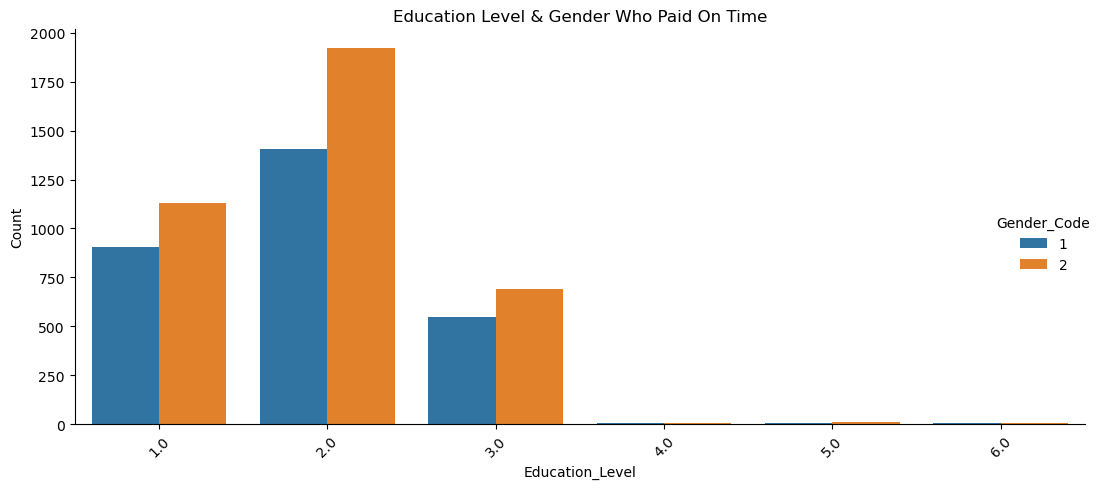

In [19]:
#Which education level and gender combination paid on time most
import seaborn as sns
import matplotlib.pyplot as plt
df['Gender_Code'] = df['Gender_Code'].astype(str)
df['Education_Level'] = df['Education_Level'].astype(str)
paid_on_time = df[df['Will_Default_Next_Month'] == 1]
edu_gender_paid = paid_on_time.groupby(['Education_Level', 'Gender_Code']).size().reset_index(name='Count')
sns.catplot(data=edu_gender_paid, x='Education_Level', y='Count', hue='Gender_Code', kind='bar', height=5, aspect=2)
plt.title("Education Level & Gender Who Paid On Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


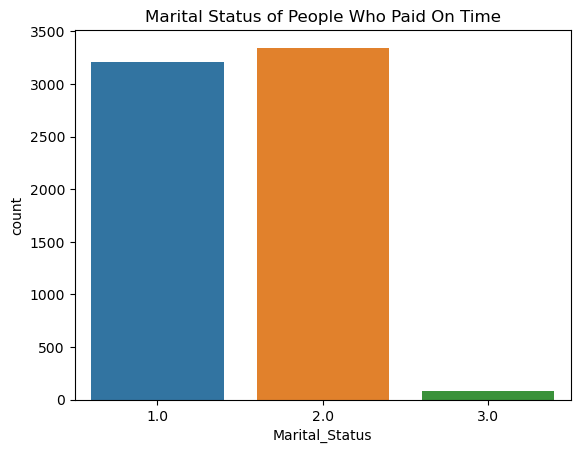

In [20]:
sns.countplot(data=paid_on_time, x='Marital_Status')
plt.title("Marital Status of People Who Paid On Time")
plt.show()

C:\Users\manas\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


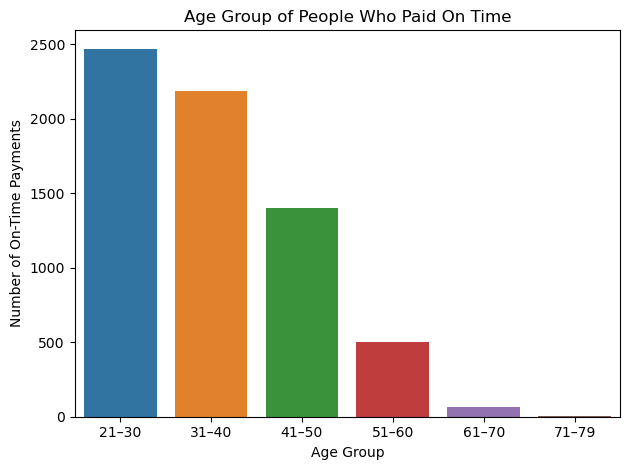

In [21]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['21–30', '31–40', '41–50', '51–60', '61–70', '71–79']
df['Age_Group'] = pd.cut(df['Age_Years'], bins=bins, labels=labels, right=True, include_lowest=True)
paid_on_time = df[df['Will_Default_Next_Month'] == 1]
age_group_paid = paid_on_time['Age_Group'].value_counts().sort_index()
sns.barplot(x=age_group_paid.index, y=age_group_paid.values)
plt.title("Age Group of People Who Paid On Time")
plt.xlabel("Age Group")
plt.ylabel("Number of On-Time Payments")
plt.tight_layout()
plt.show()

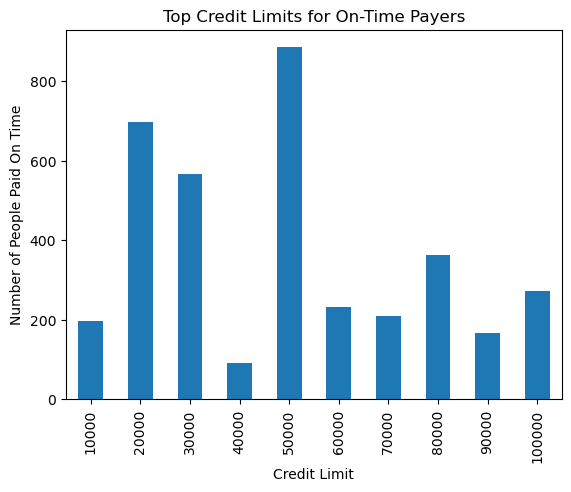

In [22]:
credit_limit_paid = df[df['Will_Default_Next_Month'] == 1]['Credit_Limit'].value_counts().sort_index()
credit_limit_paid.head(10).plot(kind='bar')
plt.title("Top Credit Limits for On-Time Payers")
plt.xlabel("Credit Limit")
plt.ylabel("Number of People Paid On Time")
plt.show()

C:\Users\manas\AppData\Local\Temp\ipykernel_16580\1329871710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_on_time['Marital_Status_Label'] = paid_on_time['Marital_Status'].map(marital_map)
C:\Users\manas\AppData\Local\Temp\ipykernel_16580\1329871710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_on_time['Group'] = (


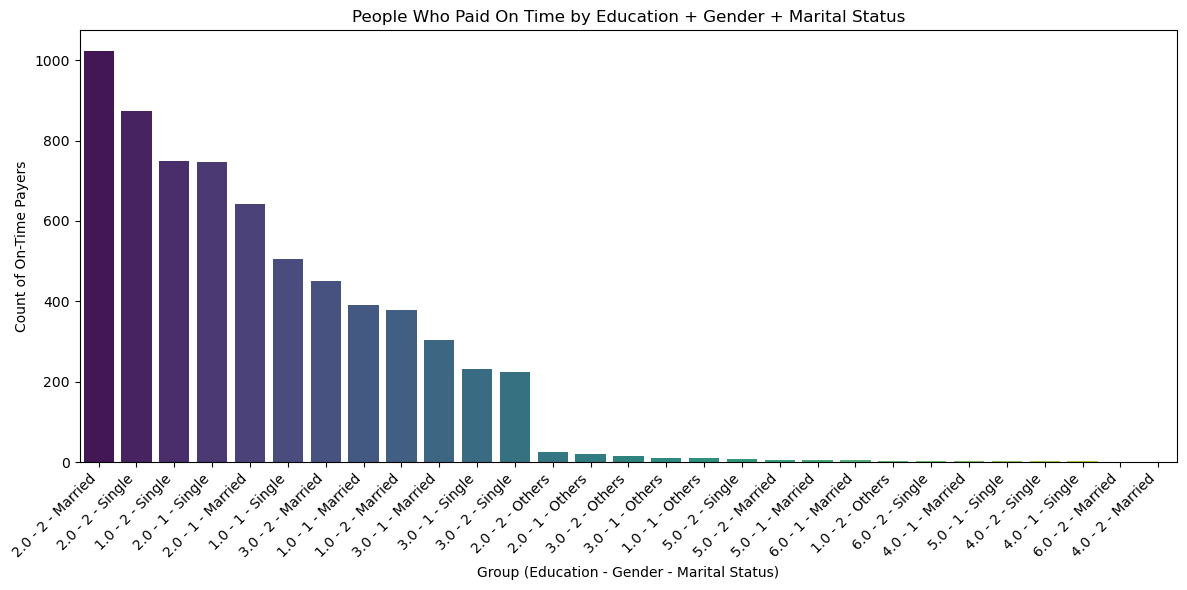

In [23]:
marital_map = {1: 'Married', 2: 'Single', 3: 'Others'}
df['Marital_Status_Label'] = df['Marital_Status'].map(marital_map)
paid_on_time['Marital_Status_Label'] = paid_on_time['Marital_Status'].map(marital_map)
paid_on_time['Group'] = (
    paid_on_time['Education_Level'] + ' - ' +
    paid_on_time['Gender_Code'] + ' - ' +
    paid_on_time['Marital_Status_Label']
)
group_counts = paid_on_time['Group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=group_counts, x='Group', y='Count', palette='viridis')
plt.title("People Who Paid On Time by Education + Gender + Marital Status")
plt.ylabel("Count of On-Time Payers")
plt.xlabel("Group (Education - Gender - Marital Status)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [24]:
regular_payers = df[df['Will_Default_Next_Month'] == 1]
print("Age:", regular_payers['Age_Years'].mode()[0])
print("Marital Status:", regular_payers['Marital_Status'].mode()[0])
print("Education Level:", regular_payers['Education_Level'].mode()[0])
months = ['PaidAmt_Apr', 'PaidAmt_May', 'PaidAmt_Jun', 'PaidAmt_Jul', 'PaidAmt_Aug', 'PaidAmt_Sep']
most_paid_month = regular_payers[months].mean().idxmax()
print("Month with Highest Average Payment:", most_paid_month)

Age: 27
Marital Status: 2.0
Education Level: 2.0
Month with Highest Average Payment: PaidAmt_Apr


In [25]:
"""
These are the inferences i got from my data and eda part. 
1)Females are more than male 
2)University students. Decreasing Order is University->Graduate->High School->Others 
3)Female Paid On time 
4)University female students paid on time and next university male and next graduate female and next graduate male.... 
5) Single people paid on time and next married people and next others 
6) Age group 21-40 paid on time 
7) Most common details of regular payers Age - 27 Education - 2(University) Marital Status- 2(Single)  Month with Highest Average Payment: PaidAmt_Apr  
8)Credit limit 50,000 is paid more on time and next 20,000 and next 30,000
9)In my dataset repay consists of 0,-2 values. They represent -2 represent that person paid 2 months early and 0 represents person paid on time no advance, no delay.
10) Features extra I created are Gender+Education, Gender+Marital, Education+Marital.
11) University + Female + Married paid mostly on time.
12)From all the inferences I can create one more feature called High_Payer_Profile

"""
df['High_Payer_Profile'] = (
    ((df['Gender_Code'] == 2) & (df['Education_Level'] == 2) & (df['Marital_Status'] == 1)) |
    ((df['Age_Years'] == 27) & (df['Education_Level'] == 2) & (df['Marital_Status'] == 2))
).astype(int)

In [26]:
df['Marital_Status'] = (df['Marital_Status']).astype(int)
df['Gender_Code'] = (df['Gender_Code']).astype(int)
df['Education_Level'] = df['Education_Level'].astype(float).astype(int)

In [27]:
df['Gender_Education'] = df['Gender_Code'].astype(str) + '_' + df['Education_Level'].astype(str)
df['Gender_Marital'] = df['Gender_Code'].astype(str) + '_' + df['Marital_Status'].astype(str)
df['Education_Marital'] = df['Education_Level'].astype(str) + '_' + df['Marital_Status'].astype(str)
df['Gender_Education_Marital'] = df['Gender_Code'].astype(str) + '_' + df['Education_Level'].astype(str) + '_' + df['Marital_Status'].astype(str)

In [28]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Will_Default_Next_Month')

C:\Users\manas\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


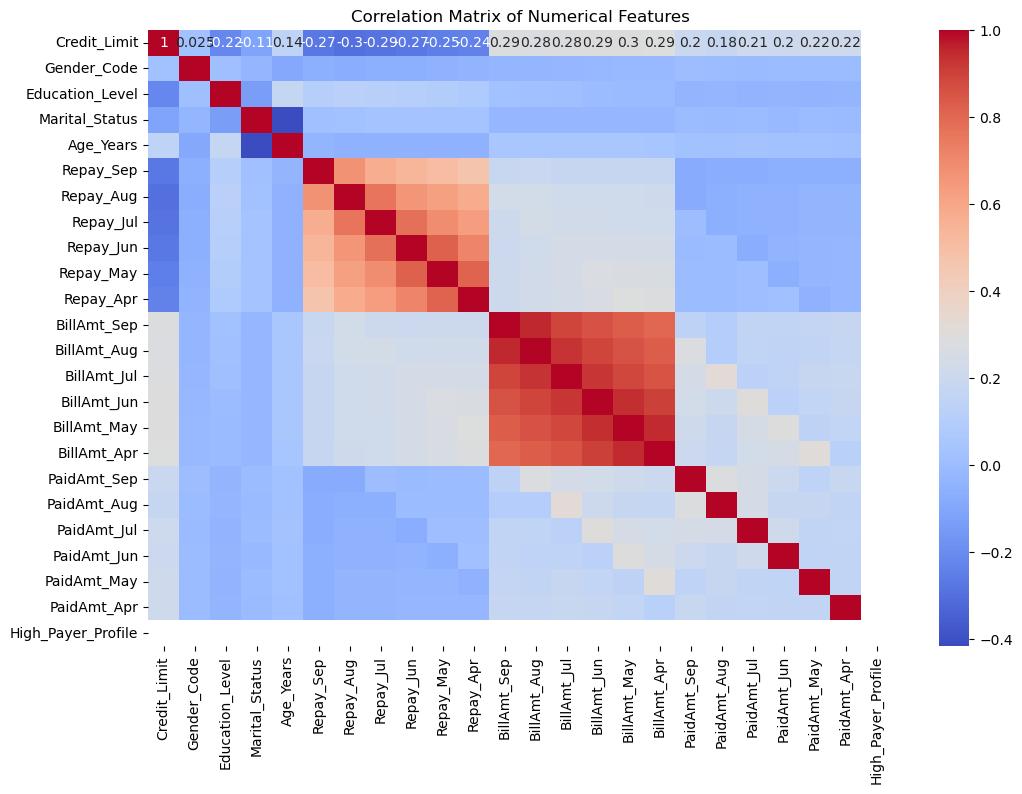

In [29]:
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [30]:
df.shape

(30000, 31)

In [31]:
cat_features = df.select_dtypes(exclude = ['number']).columns.tolist()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
en = ohe.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(en, columns = ohe.get_feature_names_out(cat_features), index = df.index)
df = pd.concat([df,encoded_df], axis = 1)

In [32]:
df.shape

(30000, 111)

In [33]:
df.drop(columns = df[cat_features],inplace = True)

In [34]:
df.shape

(30000, 105)

In [35]:
"From my heatmap there are no highly correlated features."
variance = df.var(numeric_only=True)
zero_variance_cols = variance[variance == 0].index.tolist()
df.drop(columns = zero_variance_cols, inplace = True)

In [36]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
df.drop(columns = to_drop, inplace = True)

In [37]:
from scipy.stats import zscore
z_score = df.select_dtypes(include = 'number').apply(zscore)
outliers = (z_score > 3) | (z_score < -3)
df[outliers.any(axis = 1)]

,Credit_Limit,Gender_Code,Education_Level,Marital_Status,Age_Years,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,BillAmt_Sep,...,Gender_Education_Marital_2_1_2,Gender_Education_Marital_2_1_3,Gender_Education_Marital_2_2_1,Gender_Education_Marital_2_2_2,Gender_Education_Marital_2_2_3,Gender_Education_Marital_2_3_1,Gender_Education_Marital_2_3_2,Gender_Education_Marital_2_5_2,Gender_Education_Marital_2_6_1,Gender_Education_Marital_2_6_2
4,50000,1,2,1,57,-1,0,-1,0,8617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,50000,1,1,2,37,0,0,0,0,64400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,500000,1,1,2,29,0,0,0,0,367965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,140000,2,3,1,28,0,0,2,0,11285,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,20000,1,3,2,35,-2,-2,-2,-2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,188948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,150000,1,3,2,43,-1,-1,-1,-1,1683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,30000,1,2,2,37,4,3,2,-1,3565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,80000,1,3,1,41,1,-1,0,0,-1645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
numeric_cols = df.select_dtypes(include='number').drop(columns=['Credit_Limit'])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
outl = (numeric_cols < low) | (numeric_cols > high)
df[outl.any(axis=1)]

,Credit_Limit,Gender_Code,Education_Level,Marital_Status,Age_Years,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,BillAmt_Sep,...,Gender_Education_Marital_2_1_2,Gender_Education_Marital_2_1_3,Gender_Education_Marital_2_2_1,Gender_Education_Marital_2_2_2,Gender_Education_Marital_2_2_3,Gender_Education_Marital_2_3_1,Gender_Education_Marital_2_3_2,Gender_Education_Marital_2_5_2,Gender_Education_Marital_2_6_1,Gender_Education_Marital_2_6_2
0,20000,2,2,1,24,2,2,-1,-1,3913,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120000,2,2,2,26,-1,2,0,0,2682,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90000,2,2,2,34,0,0,0,0,29239,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50000,2,2,1,37,0,0,0,0,46990,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000,1,2,1,57,-1,0,-1,0,8617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,188948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,150000,1,3,2,43,-1,-1,-1,-1,1683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,30000,1,2,2,37,4,3,2,-1,3565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,80000,1,3,1,41,1,-1,0,0,-1645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\manas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


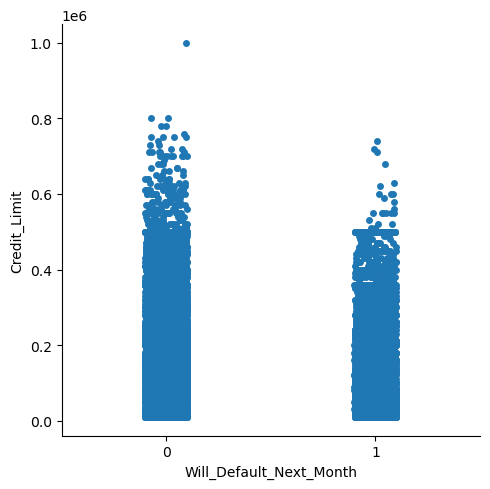

In [39]:
sns.catplot(data = df, x = "Will_Default_Next_Month", y = "Credit_Limit")
plt.show()

In [40]:
#dataframe without outliers to test whether it affects evaluation metrics
dup_df = df
clipping = dup_df.clip(lower = low,upper = high, axis = 1)

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include = 'number'))
scaled_df = pd.DataFrame(scaled_df, columns = (df.select_dtypes(include = 'number')).columns)
df = scaled_df
df.shape

(30000, 88)

In [42]:
scaled_df = scaler.fit_transform(dup_df.select_dtypes(include = 'number'))
scaled_df = pd.DataFrame(scaled_df, columns = (dup_df.select_dtypes(include = 'number')).columns)
dup_df = scaled_df

In [43]:
df.columns

Index(['Credit_Limit', 'Gender_Code', 'Education_Level', 'Marital_Status',
       'Age_Years', 'Repay_Sep', 'Repay_Aug', 'Repay_Jul', 'Repay_Jun',
       'BillAmt_Sep', 'PaidAmt_Sep', 'PaidAmt_Aug', 'PaidAmt_Jul',
       'PaidAmt_Jun', 'PaidAmt_May', 'PaidAmt_Apr', 'Will_Default_Next_Month',
       'Age_Group_21–30', 'Age_Group_31–40', 'Age_Group_41–50',
       'Age_Group_51–60', 'Age_Group_61–70', 'Age_Group_71–79',
       'Marital_Status_Label_Others', 'Gender_Education_1_1',
       'Gender_Education_1_2', 'Gender_Education_1_3', 'Gender_Education_1_4',
       'Gender_Education_1_5', 'Gender_Education_1_6', 'Gender_Education_2_1',
       'Gender_Education_2_2', 'Gender_Education_2_3', 'Gender_Education_2_4',
       'Gender_Education_2_5', 'Gender_Education_2_6', 'Gender_Marital_1_1',
       'Gender_Marital_1_2', 'Gender_Marital_1_3', 'Gender_Marital_2_1',
       'Gender_Marital_2_2', 'Gender_Marital_2_3', 'Education_Marital_1_1',
       'Education_Marital_1_2', 'Education_Marital_1_3

In [44]:
y = df['Will_Default_Next_Month']
X = df.drop(columns=['Will_Default_Next_Month'])

In [45]:
#without outliers
y2 = dup_df['Will_Default_Next_Month']
X2 = dup_df.drop(columns=['Will_Default_Next_Month'])

In [46]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
y_prob = lr.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_score)

Accuracy: 0.6678333333333333
Precision: 0.35817717206132876
Recall: 0.6337603617181613
F1 Score: 0.457687074829932

Confusion Matrix:
 [[3166 1507]
 [ 486  841]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      4673
         1.0       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.66      0.61      6000
weighted avg       0.75      0.67      0.69      6000

AUC-ROC Score: 0.7098910817179807


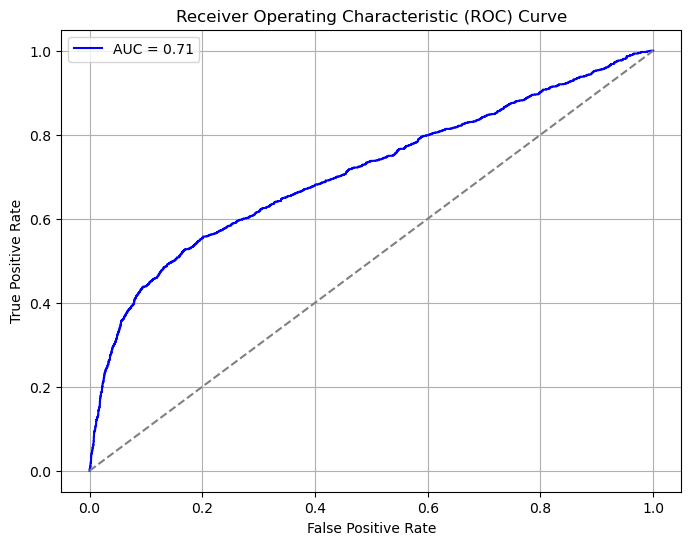

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_res2, y_train_res2 = smote.fit_resample(X_train2, y_train2)

In [50]:
#without outliers
lr2 = LogisticRegression(max_iter=1000, random_state=42)
lr2.fit(X_train_res2, y_train_res2)
y_pred2 = lr2.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Precision:", precision_score(y_test2, y_pred2))
print("Recall:", recall_score(y_test2, y_pred2))
print("F1 Score:", f1_score(y_test2, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred2))
print("\nClassification Report:\n", classification_report(y_test2, y_pred2))
y_prob2 = lr2.predict_proba(X_test2)[:, 1]
auc_score2 = roc_auc_score(y_test2, y_prob2)
print("AUC-ROC Score:", auc_score2)

Accuracy: 0.6678333333333333
Precision: 0.35817717206132876
Recall: 0.6337603617181613
F1 Score: 0.457687074829932

Confusion Matrix:
 [[3166 1507]
 [ 486  841]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      4673
         1.0       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.66      0.61      6000
weighted avg       0.75      0.67      0.69      6000

AUC-ROC Score: 0.7098910817179807


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,           
    random_state=42,
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"AUC-ROC Score: {auc_roc}")

Accuracy: 0.814
Precision: 0.6393659180977543
Recall: 0.36473247927656366
F1 Score: 0.46449136276391556
Confusion Matrix:
 [[4400  273]
 [ 843  484]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4673
         1.0       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.81      0.79      6000

AUC-ROC Score: 0.7465857913899066


In [52]:
#without outliers
rf2 = RandomForestClassifier(
    n_estimators=100,           
    random_state=42,
)
rf2.fit(X_train2, y_train2)
y_pred2 = rf.predict(X_test2)
y_prob2 = rf.predict_proba(X_test2)[:, 1]  
accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)
f12 = f1_score(y_test2, y_pred2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
class_report2 = classification_report(y_test2, y_pred2)
auc_roc2 = roc_auc_score(y_test2, y_prob2)
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1 Score: {f12}")
print("Confusion Matrix:\n", conf_matrix2)
print("Classification Report:\n", class_report2)
print(f"AUC-ROC Score: {auc_roc2}")

Accuracy: 0.814
Precision: 0.6393659180977543
Recall: 0.36473247927656366
F1 Score: 0.46449136276391556
Confusion Matrix:
 [[4400  273]
 [ 843  484]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4673
         1.0       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.81      0.79      6000

AUC-ROC Score: 0.7465857913899066


In [53]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)  
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [54]:
y_pred = svm.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy Score: 0.8141666666666667
Precision: 0.6424731182795699
Recall: 0.3602110022607385
F1 Score: 0.46161274746499276

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4673
         1.0       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000

Confusion Matrix:
[[4407  266]
 [ 849  478]]


In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7321666666666666
Precision: 0.42473118279569894
Recall: 0.5953278070836473
F1 Score: 0.4957640414182617

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.77      0.82      4673
         1.0       0.42      0.60      0.50      1327

    accuracy                           0.73      6000
   macro avg       0.65      0.68      0.66      6000
weighted avg       0.77      0.73      0.75      6000

Confusion Matrix:
[[3603 1070]
 [ 537  790]]


In [57]:
!pip install xgboost

In [58]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7998333333333333
Precision: 0.565625
Recall: 0.4091936699321778
F1 Score: 0.474857892435505

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      4673
         1.0       0.57      0.41      0.47      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.78      0.80      0.79      6000

Confusion Matrix:
[[4256  417]
 [ 784  543]]


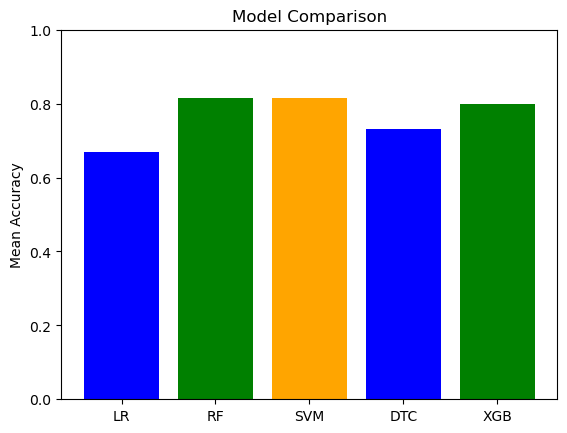

In [59]:
import matplotlib.pyplot as plt

models = ['LR', 'RF', 'SVM', 'DTC', 'XGB']
scores = [0.6678, 0.814, 0.814, 0.732, 0.799]  

plt.bar(models, scores, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Mean Accuracy')
plt.title('Model Comparison')
plt.show()

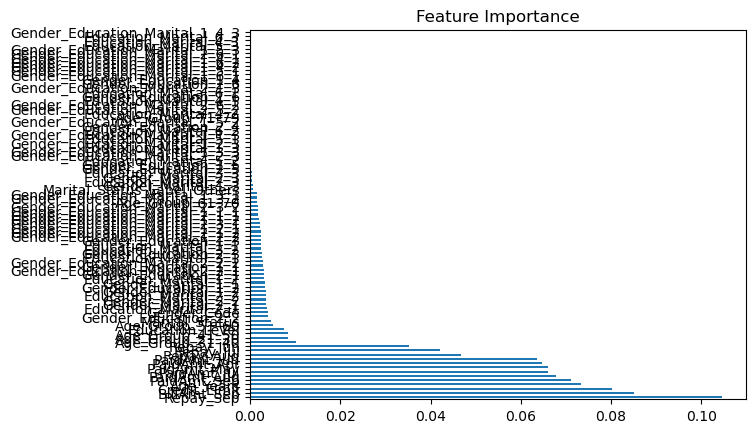

In [71]:
#feature importance for rf model
importances = rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importance')
plt.show()

In [72]:
# Predicted probabilities for the positive class
probs = rf.predict_proba(X_test)[:, 1]
risk_category = pd.cut(probs, bins=[0, 0.4, 0.7, 1.0], labels=['Low', 'Medium', 'High'])
X_test_risk = X_test.copy()
X_test_risk['Risk_Segment'] = risk_category
X_test_risk


,Credit_Limit,Gender_Code,Education_Level,Marital_Status,Age_Years,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,BillAmt_Sep,...,Gender_Education_Marital_2_1_3,Gender_Education_Marital_2_2_1,Gender_Education_Marital_2_2_2,Gender_Education_Marital_2_2_3,Gender_Education_Marital_2_3_1,Gender_Education_Marital_2_3_2,Gender_Education_Marital_2_5_2,Gender_Education_Marital_2_6_1,Gender_Education_Marital_2_6_2,Risk_Segment
6907,-0.473684,-1.0,0.0,0.0,0.923077,-1.0,-1.0,-1.0,-1.0,-0.328046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
24575,0.052632,-1.0,-1.0,-1.0,-0.230769,-1.0,-1.0,-2.0,-2.0,-0.116185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
26766,-0.473684,-1.0,0.0,0.0,-0.692308,0.0,0.0,0.0,0.0,0.404259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
2156,0.789474,0.0,-1.0,0.0,-0.692308,0.0,0.0,0.0,0.0,4.461380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3179,1.894737,0.0,0.0,-1.0,-0.538462,-2.0,-2.0,-2.0,-2.0,-0.173573,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,0.052632,0.0,3.0,0.0,-0.538462,-2.0,-2.0,-1.0,-1.0,-0.160603,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Low
1259,-0.473684,-1.0,-1.0,0.0,-0.769231,2.0,2.0,0.0,0.0,0.433866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium
27309,0.421053,-1.0,-1.0,0.0,0.000000,0.0,0.0,-1.0,-1.0,-0.122670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
29583,-0.105263,-1.0,-1.0,0.0,-0.615385,-1.0,-1.0,-1.0,-2.0,-0.314793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
